In [1]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.metrics import silhouette_samples, silhouette_score, fowlkes_mallows_score
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS,TSNE 

# Unsupervised learning

<img src="https://miro.medium.com/v2/resize:fit:1400/0*tamvSiqDneDfw2Vr" width="500"/>

Unsupervised learning is a branch of machine learning where the algorithm is tasked with finding hidden patterns or structures in unlabeled data. Unlike supervised learning, there are no predefined labels or target variables guiding the learning process. Instead, the algorithm explores the data and identifies similarities, differences, or groupings on its own. Unsupervised learning techniques are used for tasks such as clustering, dimensionality reduction, and anomaly detection, providing valuable insights into the underlying structure of the data without the need for human intervention or labeled examples.

## Clustering

Cluster analysis, sometimes referred to as data segmentation, serves several purposes, all of which involve organizing a set of objects into subsets or "clusters." The aim is for objects within each cluster to be more similar to one another than to those in other clusters. Objects can be characterized by measurements or by their relationships with other objects.

In this session, we'll begin with the iris dataset, which should be familiar to you from our previous class.


In [2]:
iris_data = pd.read_csv("../data/iris_original.csv")
iris_data.head()

,petal_length,petal_width,sepal_length,sepal_width,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


For simplicity, let's try to cluster the data based on the sepal_length and sepal_width only.  
First, let's plot the 2D relationship between these two columns, colored by the species name.

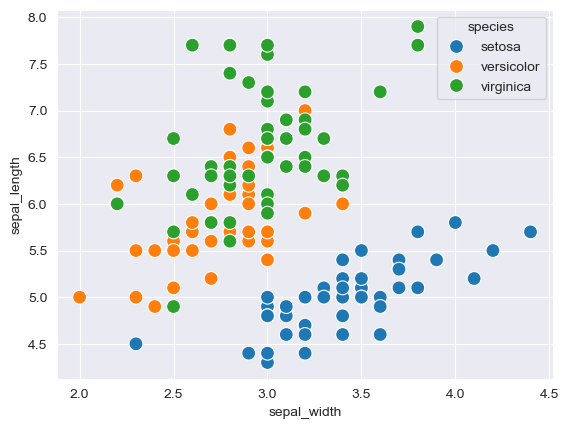

In [3]:
sns.scatterplot(data = iris_data, x= "sepal_width",y="sepal_length", hue = "species", s = 100);

Given the clear separation among iris species in the scatter plot, we're curious if we can partition the dataset into three distinct clusters based solely on the 2D distribution. To explore this, we'll use the K-means clustering algorithm on the first two features (sepal length and width). If the clusters align with species, it suggests these features alone can distinguish between species. Let's apply K-means and examine the clusters to assess their correspondence with species groupings.

### k-means clustering:


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/440px-K-means_convergence.gif" width="400"/>


*The [KMeans algorithm](https://en.wikipedia.org/wiki/K-means_clustering) relies on calculating the distances between data points in a **multidimensional space**, typically using the Euclidean distance metric*:
For given points, p and q in an $n$ dimensional space, the distance is given by:

$d(p,q) = \sqrt{(q_1-p_1)^2+(q_2-p_2)^2+...+(q_n-p_n)^2} $

The Kmeans algorithm: 

**1. Initialization**: First, you decide how many clusters you want (let's call it 'K'). Then, you randomly place 'K' points on the paper. These points are the initial centroids of the clusters.

**2. Assignment**: Next, for each point on the paper, you calculate its distance to each centroid. You assign the point to the cluster whose centroid is closest to it. This step groups all the points into 'K' clusters.

**3. Update**: After assigning points to clusters, you recalculate the centroids of the clusters. The new centroids are the mean (average) of all the points in each cluster.

*Steps 2 and 3 are repeated until the centroids stop changing or until you reach a specified number of iterations. This process helps refine the clusters, moving centroids to better represent the points they're assigned to.*

Convergence: Eventually, the centroids will stabilize, meaning they won't change significantly between iterations. At this point, the algorithm has converged, and you have your final clusters.

Let's apply the K-means algorithm assuming **3** different clusters, using the `Kmeans` function under sklearn.cluster.

In [4]:
data_2d = iris_data[["sepal_width","sepal_length"]]
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_2d)

KMeans(n_clusters=3, random_state=42)

Labels for each observation:

In [5]:
labels = kmeans.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

The three final centroids:

In [6]:
centroids = kmeans.cluster_centers_
centroids

array([[3.07446809, 6.81276596],
       [2.69245283, 5.77358491],
       [3.428     , 5.006     ]])

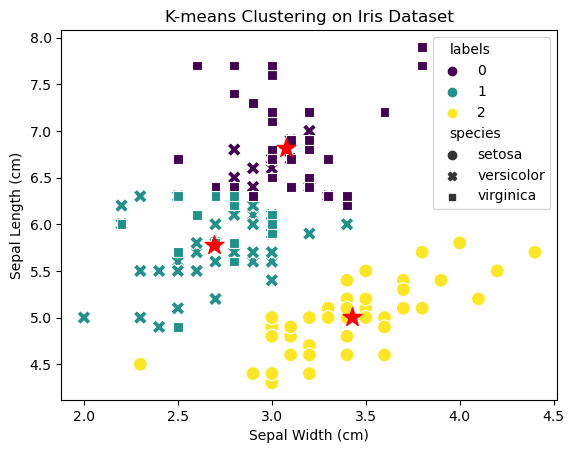

In [7]:
# Plot the original data points
iris_data["labels"] = labels
sns.scatterplot(data = iris_data, x="sepal_width", y="sepal_length", hue="labels",style = "species", palette='viridis', s= 100)

# Plot the centroids of the clusters
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red', s=200)

plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('K-means Clustering on Iris Dataset');

Figuring out how good our clusters are without prior knowledge is tricky. The [silhouette score](https://en.wikipedia.org/wiki/Silhouette_(clustering)) is a key metric for this (note that there are other possible [clustering metrics](https://scikit-learn.org/stable/modules/clustering.html)), telling us how close points are within clusters and how far apart they are from points in other clusters. The score ranges from -1 to 1;  The best value is 1, indicating well-separated clusters, while the worst value is -1, indicating incorrect cluster assignments. Values close to 0 suggest overlapping clusters. Negative values typically mean that a sample is more similar to a different cluster, indicating a potential misclassification.

So, when we're wondering if having three clusters is better than having six, we can use the silhouette score to compare them. But remember, it's not the only thing to consider; other factors like domain knowledge should also be considered.


Calculating the silhouette score for each data point:

1. Calculate cohesion: the average distance to all other points within the same cluster (cohesion).
2. Calculate separation: the average distance to all points in the nearest neighboring cluster (separation).
3. Use the formula: silhouette coefficient = (separation - cohesion) / max(separation, cohesion).

To calculate the overall silhouette score ,simply esitmate the average silhouette coefficient across all data points.
Here, we will use the `silhouette_score` function under sklearn.metrics.

In [8]:
avg_silhouette = (silhouette_score(iris_data[["sepal_width","sepal_length"]],kmeans.labels_))
print(f"avg_silhouette_score {round(avg_silhouette,2)}")

avg_silhouette_score 0.45


### Ex1
fit the K-means algorithm using on **all** numerical features this time (sepal_width, sepal_length, petal_width, petal_length), using 2 to 9 clusters, and plot the average silhouette score as a function of the number of clusters.

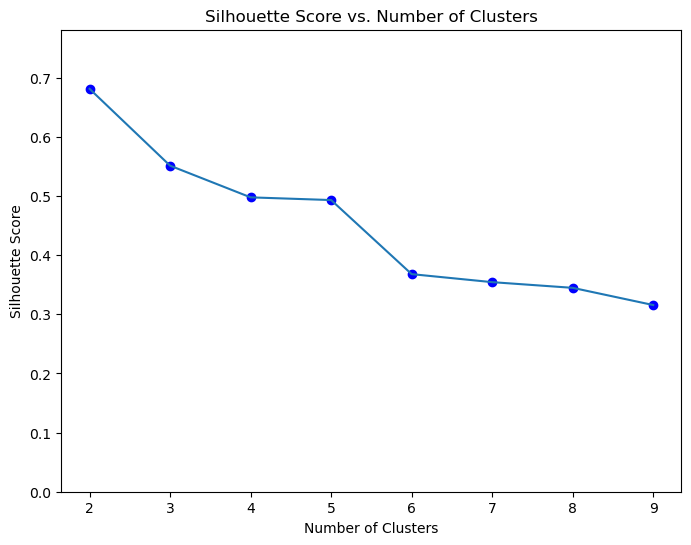

In [9]:
#Your code here

The Silhouette score suggests that splitting the data into two clusters works best. This matches what we see when we look at the distribution of versicolor and virginica species in 2D space—they're pretty close together.

### Hirerchical clustering


<img src="https://miro.medium.com/v2/resize:fit:1358/0*afzanWwrDq9vd2g-" width="400"/>

Hierarchical clustering is a popular technique used in unsupervised learning to group similar data points into clusters based on their characteristics. Unlike other clustering methods, hierarchical clustering organizes the data points into a tree-like structure called a dendrogram. This dendrogram illustrates the hierarchical relationships between clusters, allowing for a visual interpretation of the clustering process.

In hierarchical clustering, the algorithm iteratively merges or splits clusters based on a predefined similarity metric, such as Euclidean distance or correlation. There are two main types of hierarchical clustering: agglomerative and divisive:
1. Agglomerative clustering starts by treating each data point as a separate cluster and then progressively merges the closest pairs of clusters until only one cluster remains. 

<img src="http://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/sean%20bottom%20up%20approach.png" width="700"/>

3. Divisive clustering begins with all data points in a single cluster and recursively splits them into smaller clusters until each data point is in its own cluster.

<img src="http://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/Screen%20Shot%202023-02-13%20at%209.10.33%20AM.png" width="700"/>


**How are distances between two clusters estimated?**
various methods exist for defining inter-cluster distance or similarity, including:

1. Minimum Distance: the shortest distance between any two points within the cluster. (== single linkage)
2. Maximum Distance: the longest distance between any two points within the cluster. (== complete linkage)
3. Group Average: the average distance between all pairs of points across the clusters. (== average linkage)
4. Ward’s Method: Measures the distance of two clusters by assessing the increase in squared error resulting from merging them.
   The squared error is calculated by estimating the center of the cluster and summing the squared distance from each point


For ease of interpretation, we start by using only sepal_width and sepal_length for clustering.
We will use the `linkage` function under scipy.cluster.hierarchy to perform the agglomerative clustering and generate a corresponding encoding, and the `dendrogram` function under scipy.cluster.hierarchy for creating a visualization.

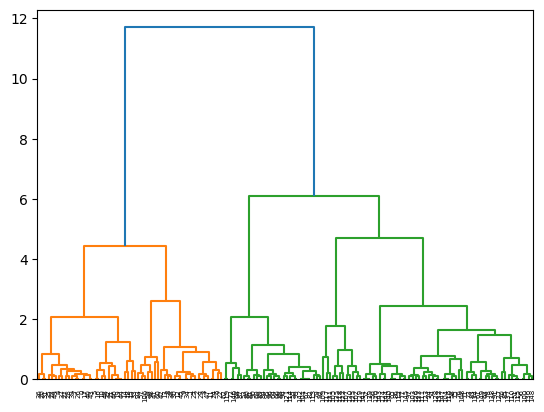

In [10]:
import scipy.cluster.hierarchy as shc
Dendrogram = shc.dendrogram((shc.linkage(data_2d, method ='ward')))

Based on the visualization, we can clearly see that the optimal number of clusters is two.

We now apply the `AgglomerativeClustering` function under sklearn.cluster.

In [11]:
agg_c = AgglomerativeClustering(n_clusters = 3).fit(data_2d)
agg_c.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0])

Visualizing the clustering:

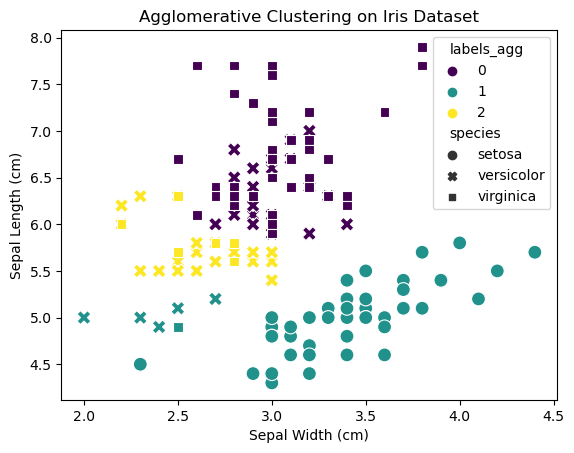

In [12]:
# Visualizing the clustering
iris_data["labels_agg"] = agg_c.labels_
sns.scatterplot(data = iris_data, x="sepal_width", y="sepal_length", hue="labels_agg",style = "species", palette='viridis', s= 100)
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('Agglomerative Clustering on Iris Dataset');

## Dimensionality reduction

### Curse of dimensionality

Imagine you have a dataset with many different characteristics or measurements for each data point. Sometimes, having too many features can lead to challenges such as increased computational complexity, overfitting in machine learning models, and difficulty in visualizing the data. Dimensionality reduction techniques address these issues by **transforming the dataset into a lower-dimensional space while retaining as much important information as possible**. 
* This reduction in dimensionality can be particularly useful for visualization, noise reduction, and improving the performance of machine learning algorithms.



### Principal component analysis (PCA)

* [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis), or PCA, is a very common linear dimensionality reduction algorithm. PCA transforms high dimensional data into a new coordinate system, where the new features, which are termed principal components, are orthogonal (meaning they are linearly uncorrelated and capture different aspects of the data without redundancy). The principal components are sorted based on the amount of variance they explain. 
* When certain features are correlated, it implies redundancy in the dataset's dimensionality. In such cases, using only the top n most important principal components is usually sufficient to capture the essential information. This approach helps reduce the dimensionality effectively while retaining the most critical aspects of the data.

How does PCA works?
Each principal component is obtained by finding a linear combination of the features that maximizes the variance between data points , while also being orthogonal to the previously extracted principal components.
Hence, the first principal component accounts for the maximum variance in the data, followed by the second component, and so on.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/600px-GaussianScatterPCA.svg.png" width="600"/>


The dataset has four columns (sepal_width, sepal_length, petal_width and petal_length). After applying PCA on our dataset, we will obtain alternative **uncorrelated** four principal components, ordered by the amount of variance they capture. 
Let's fit the PCA model to your data and then **transform the data into the principal component space**.

PCA is affected by scale! features with a larger scale will dominate the principal components since PCA is based on the covariance matrix.  Hence, before applying PCA, scaling the features is necessary. We can use the `StandardScaler` function under sklearn.preprocessing to standartize the features.

**Step-by-Step PCA Implementation**:
1. Standardize the Data: Center and scale the dataset.
2. Compute the Covariance Matrix: Find the covariance matrix of the standardized data.
3. Compute the Eigenvalues and Eigenvectors: Perform eigen decomposition on the covariance matrix.
4. Sort Eigenvalues and Eigenvectors: Sort them in descending order of eigenvalues.
5. Project the Data: Transform the original data onto the new principal component axes.


In [16]:
pca_data = iris_data[["sepal_width","sepal_length","petal_width","petal_length"]]
# Step 1: Standartize the dataset
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(pca_data)

In [17]:
# Step 2: Compute the Covariance Matrix
cov_matrix = np.cov(scaled_dataset, rowvar=False)

# Step 3: Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Step 4: Sort Eigenvalues and Eigenvectors
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

# Step 5: Project the Data onto Principal Components
PCs = np.dot(scaled_dataset, sorted_eigenvectors)

# Print shapes to illustrate
print("Original dataset shape:", scaled_dataset.shape)
print("Principal Components shape:", PCs.shape)
PCs

Original dataset shape: (150, 4)
Principal Components shape: (150, 4)


array([[-2.26470281e+00,  4.80026597e-01,  1.27706022e-01,
        -2.41682039e-02],
       [-2.08096115e+00, -6.74133557e-01,  2.34608854e-01,
        -1.03006775e-01],
       [-2.36422905e+00, -3.41908024e-01, -4.42014848e-02,
        -2.83770534e-02],
       [-2.29938422e+00, -5.97394508e-01, -9.12901063e-02,
         6.59555596e-02],
       [-2.38984217e+00,  6.46835383e-01, -1.57381957e-02,
         3.59228133e-02],
       [-2.07563095e+00,  1.48917752e+00, -2.69682944e-02,
        -6.60818022e-03],
       [-2.44402884e+00,  4.76441976e-02, -3.35470401e-01,
         3.67755572e-02],
       [-2.23284716e+00,  2.23148073e-01,  8.86954979e-02,
         2.46120962e-02],
       [-2.33464048e+00, -1.11532768e+00, -1.45076864e-01,
         2.68592208e-02],
       [-2.18432817e+00, -4.69013561e-01,  2.53765567e-01,
         3.98992877e-02],
       [-2.16631010e+00,  1.04369065e+00,  2.68681102e-01,
        -1.67313672e-02],
       [-2.32613087e+00,  1.33078335e-01, -9.37592444e-02,
      

We can simply use the PCA function

In [18]:
pca = PCA()
PCs = pca.fit_transform(scaled_dataset)
PCs.shape
PCs

array([[-2.26470281e+00,  4.80026597e-01, -1.27706022e-01,
        -2.41682039e-02],
       [-2.08096115e+00, -6.74133557e-01, -2.34608854e-01,
        -1.03006775e-01],
       [-2.36422905e+00, -3.41908024e-01,  4.42014848e-02,
        -2.83770534e-02],
       [-2.29938422e+00, -5.97394508e-01,  9.12901063e-02,
         6.59555596e-02],
       [-2.38984217e+00,  6.46835383e-01,  1.57381957e-02,
         3.59228133e-02],
       [-2.07563095e+00,  1.48917752e+00,  2.69682944e-02,
        -6.60818022e-03],
       [-2.44402884e+00,  4.76441976e-02,  3.35470401e-01,
         3.67755572e-02],
       [-2.23284716e+00,  2.23148073e-01, -8.86954979e-02,
         2.46120962e-02],
       [-2.33464048e+00, -1.11532768e+00,  1.45076864e-01,
         2.68592208e-02],
       [-2.18432817e+00, -4.69013561e-01, -2.53765567e-01,
         3.98992877e-02],
       [-2.16631010e+00,  1.04369065e+00, -2.68681102e-01,
        -1.67313672e-02],
       [-2.32613087e+00,  1.33078335e-01,  9.37592444e-02,
      

We ended up with a four-dimensional array, corresponding to four principal components ("replacing" the four original features). These principal components are arranged in order of the variance they explain (with PC1 explaining the highest fraction of variance and so on...). 
### Ex2:
make sure that the principal components are indeed uncorrelated.

In [21]:
#Your code here
dot_product = np.dot(PCs.T, PCs) # if they are uncorrelated, the off-diagonal elements should be almost zero and the diagonal elements should be 1, however, if they are correlated, the off-diagonal elements should be non-zero, and the diagonal elements should be greater than 1.
print(dot_product)

[[ 4.37774672e+02 -8.85587066e-14 -1.06356622e-14  1.30706709e-16]
 [-8.85587066e-14  1.37104571e+02 -4.78059495e-15  7.57119220e-16]
 [-1.06356622e-14 -4.78059495e-15  2.20135313e+01  5.75984310e-16]
 [ 1.30706709e-16  7.57119220e-16  5.75984310e-16  3.10722546e+00]]


The off-diagonal elements are almost zero, indicating the principal components are uncorrelated.

Now, let's estimate the fraction of variance explained by each principal component:

In [22]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762 0.03668922 0.00517871]


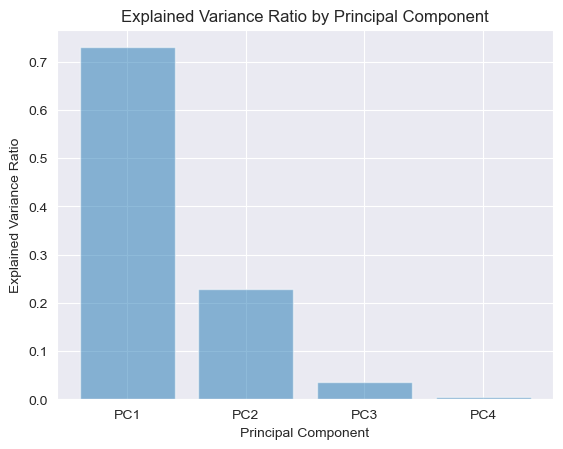

In [23]:
plt.bar(['PC1', 'PC2', 'PC3', 'PC4'], pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

We can see that PC1 already explains **72%** of the total variance! Using both PC1 and PC2 explains more than **95%** of the total variance!
It is clear that using only PC1 and PC2 should be enough to capture the data distribution.

In [24]:
df_pca = pd.DataFrame(data=PCs, columns=[f'PC{i+1}' for i in range(PCs.shape[1])])
df_pca["species"] = iris_data["species"]

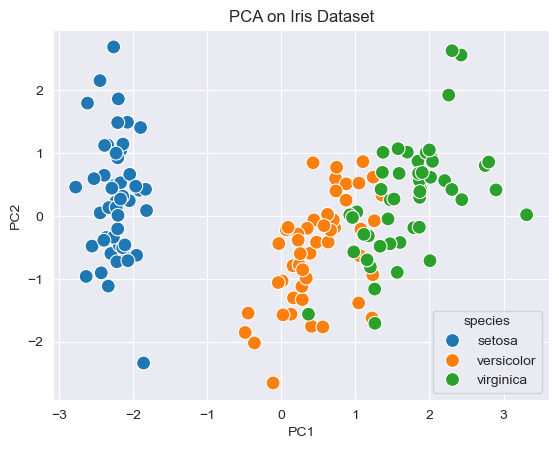

In [25]:
sns.scatterplot(data = df_pca, x="PC1", y="PC2", hue="species", s= 100)
plt.title('PCA on Iris Dataset');

We can see that the species are relatively well separated when using the first two principal components. Compare it to the first 2D plot we generated using only sepal_width and sepal_length, where the virginica and versicolor species where much less separated! Here, our two dimensions PC1 and PC2 **are based on the four columns** sepal_width, sepal_length, petal_width, petal_length, and capture most of the total variance in the data.
We can also generate a 3D plot based on the first three components:

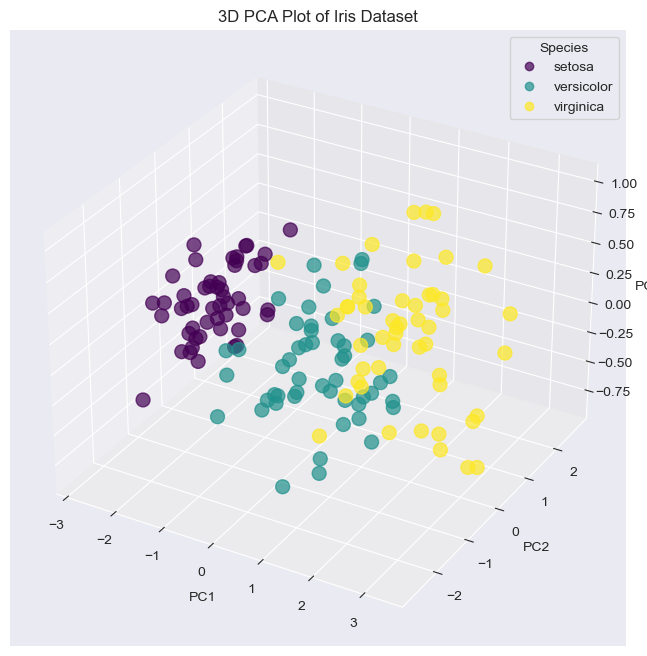

In [26]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'],
                     c=df_pca['species'].astype('category').cat.codes,  # Convert species to numeric codes for coloring
                     cmap='viridis', s=100, alpha=0.7)

# Add legend
handles, labels = scatter.legend_elements(prop="colors", alpha=0.7)
ax.legend(handles, df_pca['species'].astype('category').cat.categories, title="Species")

# Labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Plot of Iris Dataset')

plt.show()

### Ex3

Conduct PCA without applying scaling. Multiply one of the columns by a large constant, then check if the results differ when plotting PC1 versus PC2.

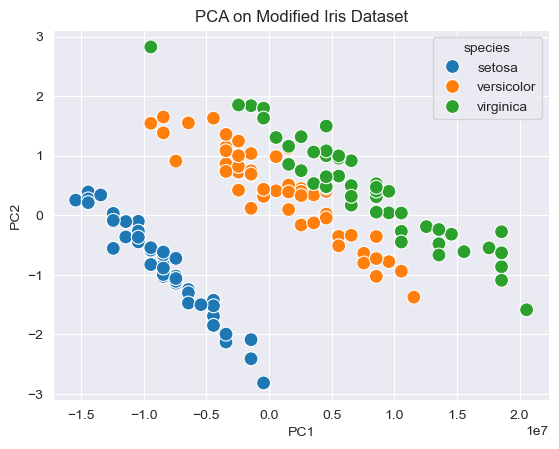

In [32]:
#Your code here
# Copy the original data
pca_data_modified = iris_data[["sepal_width","sepal_length","petal_width","petal_length"]].copy()

# Multiply one of the columns by a large constant
pca_data_modified["sepal_length"] *= 10000000

# Perform PCA without scaling
pca = PCA()
PCs_modified = pca.fit_transform(pca_data_modified)

# Convert to DataFrame for easier plotting
df_pca_modified = pd.DataFrame(data=PCs_modified, columns=[f'PC{i+1}' for i in range(PCs_modified.shape[1])])
df_pca_modified["species"] = iris_data["species"]

# Plot PC1 versus PC2
sns.scatterplot(data=df_pca_modified, x="PC1", y="PC2", hue="species", s=100)
plt.title('PCA on Modified Iris Dataset');

# pca_data_test = pca_data.copy()
# pca_data_test["sepal_width"] =  pca_data_test["sepal_width"]*10000000
# pca_test = PCA()
# PCs_test = pca_test.fit_transform(pca_data_test)
# df_pca_test = pd.DataFrame(data=PCs_test, columns=[f'PC{i+1}' for i in range(PCs_test.shape[1])])
# df_pca_test["species"] = iris_data["species"]
# sns.scatterplot(data = df_pca_test, x="PC1", y="PC2", hue="species", s= 100)
# plt.title('PCA test on Iris Dataset');

### Multidimensional scaling (MDS)

[Multidimensional scaling](https://en.wikipedia.org/wiki/K-means_clustering) is a method for generating a low dimeninsional representation of points in high dimensional space, keeping their pairwise distances as close as possible to the original distances. 
It is a non-linear generate low dimensional representations that differ from those generated by linear methods like PCA.
How does it work?
* Metric MDS is an iterative process in which the following loss function is minimized:
${\displaystyle {\text{Stress}}_{D}(x_{1},x_{2},...,x_{n})={\sqrt {\sum _{i\neq j=1,...,n}{\bigl (}d_{ij}-\|x_{i}-x_{j}\|{\bigr )}^{2}}}.}$
Where $d_{ij}$ denotes the distance between points i and j, while $x_{i},x_{j}$ denote the low dimensional representation of points i and j, respectively.

* Non-metric MDS is a version of MDS that doesn't require the exact distances between objects, only their relative similarities or dissimilarities. It focuses on preserving the rank order of the distances rather than their precise values. It employs an iterative process to discover the optimal arrangement of points, maximizing the correlation between the original and low dimensional distances. This method is suitable for ordinal data.

In [29]:
mds_data = iris_data[["sepal_width","sepal_length","petal_width","petal_length"]]
embedding = MDS(n_components=2, normalized_stress='auto')
X_transformed = embedding.fit_transform(mds_data)
X_transformed.shape

(150, 2)

In [30]:
df_mds = pd.DataFrame(data=X_transformed, columns=['V1','V2'])
df_mds["species"] = iris_data["species"]

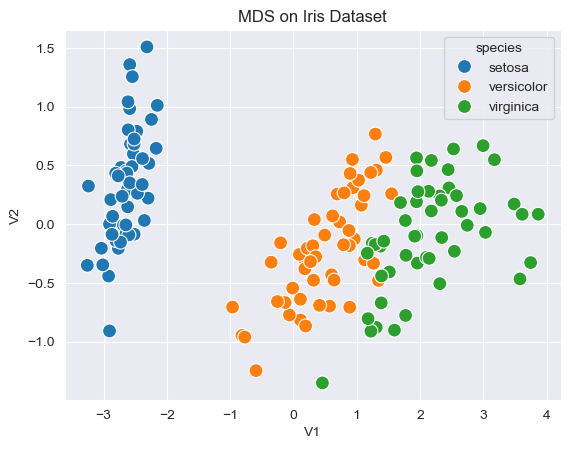

In [31]:
sns.scatterplot(data = df_mds, x="V1", y="V2", hue="species", s= 100)
plt.title('MDS on Iris Dataset');

We achieved a reasonably good separation between clusters, although the representation we obtained differs from that of PCA.

### t-distributed stochastic neighbor embedding (TSNE)

[TSNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) is also a common *nonlinear* dimensionality reduction tool for visualizing high dimensional data in lower dimensional space. Unlike PCA, it is able to work properly on linear unseparable data:

<img src="https://miro.medium.com/v2/resize:fit:600/format:webp/0*rPhupOA95cU_GmCD.png" width="300"/>

It is based on a probablistic approach, in which similarities between pairs of points are converted to joint probabilities: close points are assinged relatively high probabilities while dissimilar points are assinged with relatively low probabilities. 

How does it work?
1. First, a distance matrix between points is calculated assuming Euclidean distance.
2. Then, distances are converted to probabilities. The probability $p_{ij}$ expresses the likelihood of point $i$ to "choose" a neighboring point $j$. This probability distribution is modeled as a Gaussian distribution.
The variance σ for this distribution determines its width, affecting the length of its tails. Typically, users do not directly select the variance. Instead, a related metric known as **perplexity**, usually set between 5 and 50, determines the effective number of nearest neighbors used in calculating conditional probabilities. Perplexity plays a crucial role in balancing the local and global aspects of the data manifold. Higher perplexity values result in considering more nearest neighbors, making the algorithm less sensitive to small-scale structures. Conversely, lower perplexity values involve fewer neighbors, prioritizing local information over global context. As dataset sizes increase, more points are needed to adequately capture the local neighborhood, potentially necessitating larger perplexities. Similarly, noisier datasets may require larger perplexity values to encompass sufficient local neighbors, allowing insights beyond the background noise.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Student_t_pdf.svg/325px-Student_t_pdf.svg.png" width="300"/>

4. Next, based on these probabilities, a symmetric probability matrix P is constructed where $p_{ij}$ represents the probability of picking $j$ as a neighbor given $i$.
${\displaystyle p_{j\mid i}={\frac {\exp(-\lVert \mathbf {x} _{i}-\mathbf {x} _{j}\rVert ^{2}/2\sigma _{i}^{2})}{\sum _{k\neq i}\exp(-\lVert \mathbf {x} _{i}-\mathbf {x} _{k}\rVert ^{2}/2\sigma _{i}^{2})}}}$ ; 
${\displaystyle p_{ij}={\frac {p_{j\mid i}+p_{i\mid j}}{2N}}}$

6. A joint probability distribution $q_{ij}$ is then defined in the low-dimensional space, typically a two-dimensional space for visualization purposes.
7. In order to find the probability $q_{ij}$ that best suits the original probability distribution $p_{ij}$ The algorithm minimizes the [Kullback-Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) divergence between the joint probabilities $q_{ij}$ and the probabilities $p_{ij}$ from the high-dimensional space, using techniques like [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent).   ${\displaystyle \mathrm {KL} \left(P\parallel Q\right)=\sum _{i\neq j}p_{ij}\log {\frac {p_{ij}}{q_{ij}}}}$


Let's fit the TSNE algorithm on our data, using a preplexity value of 5.

In [33]:
tsne_data = iris_data[["sepal_width","sepal_length","petal_width","petal_length"]]
X_transformed_TSNE = TSNE(n_components=2, perplexity=5).fit_transform(tsne_data )

In [34]:
df_TSNE = pd.DataFrame(data=X_transformed_TSNE, columns=['V1','V2'])
df_TSNE["species"] = iris_data["species"]

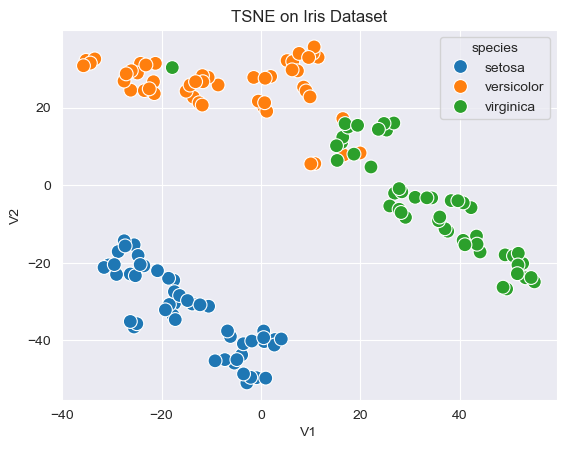

In [35]:
sns.scatterplot(data = df_TSNE, x="V1", y="V2", hue="species", s= 100)
plt.title('TSNE on Iris Dataset');

### Ex4
How will the perplexity parameter affect the resulting embeddings? Try the following perplexity values: 5, 10, 20, and 40. Generate an appropriate figure to illustrate the effect of perplexity on the resulting embeddings.

In [1]:
#Your code here
# perplexities = [5, 10, 20, 40]
# fig, axes = plt.subplots(2, 2, figsize=(10, 10))
# axes = axes.ravel() # ravel returns a contiguous flattened array
# for i, perplexity in enumerate(perplexities):
#     X_transformed_TSNE = TSNE(n_components=2, perplexity=perplexity).fit_transform(tsne_data)
#     df_TSNE = pd.DataFrame(data=X_transformed_TSNE, columns=['V1','V2'])
#     df_TSNE["species"] = iris_data["species"]
#     sns.scatterplot(data = df_TSNE, x="V1", y="V2", hue="species", s= 100, ax=axes[i])
#     axes[i].set_title(f'TSNE on Iris Dataset with perplexity={perplexity}');

perplexities = [5, 10, 20, 40]
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel() # ravel returns a contiguous flattened array

# Create a list to store the scatter plots
scatters = []

for i, perplexity in enumerate(perplexities):
    X_transformed_TSNE = TSNE(n_components=2, perplexity=perplexity).fit_transform(tsne_data)
    df_TSNE = pd.DataFrame(data=X_transformed_TSNE, columns=['V1','V2'])
    df_TSNE["species"] = iris_data["species"]
    
    # Create the scatter plot and add it to the list, set legend to False
    scatter = sns.scatterplot(data = df_TSNE, x="V1", y="V2", hue="species", s= 100, ax=axes[i], legend=False)
    scatters.append(scatter)
    
    axes[i].set_title(f'TSNE on Iris Dataset with perplexity={perplexity}')

# Create a single legend for the figure using the labels and handles from the last scatter plot
handles, labels = scatters[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4) # the legend does not show snd I don't know why
plt.show()

NameError: name 'plt' is not defined